1.     Pobierz dane dla Boston Housing Dataset

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd 
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(url, sep='\s+', names=names)

2.     Wykonaj podstawową Exploratory Data Analysis (EDA) na zbiorze danych, aby zrozumieć jego strukturę i charakterystyki. Możesz użyć bibliotek takich jak pandas, numpy, matplotlib i seaborn. W szczególności sprawdź współliniowość zmiennych.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
df.duplicated().sum()

0

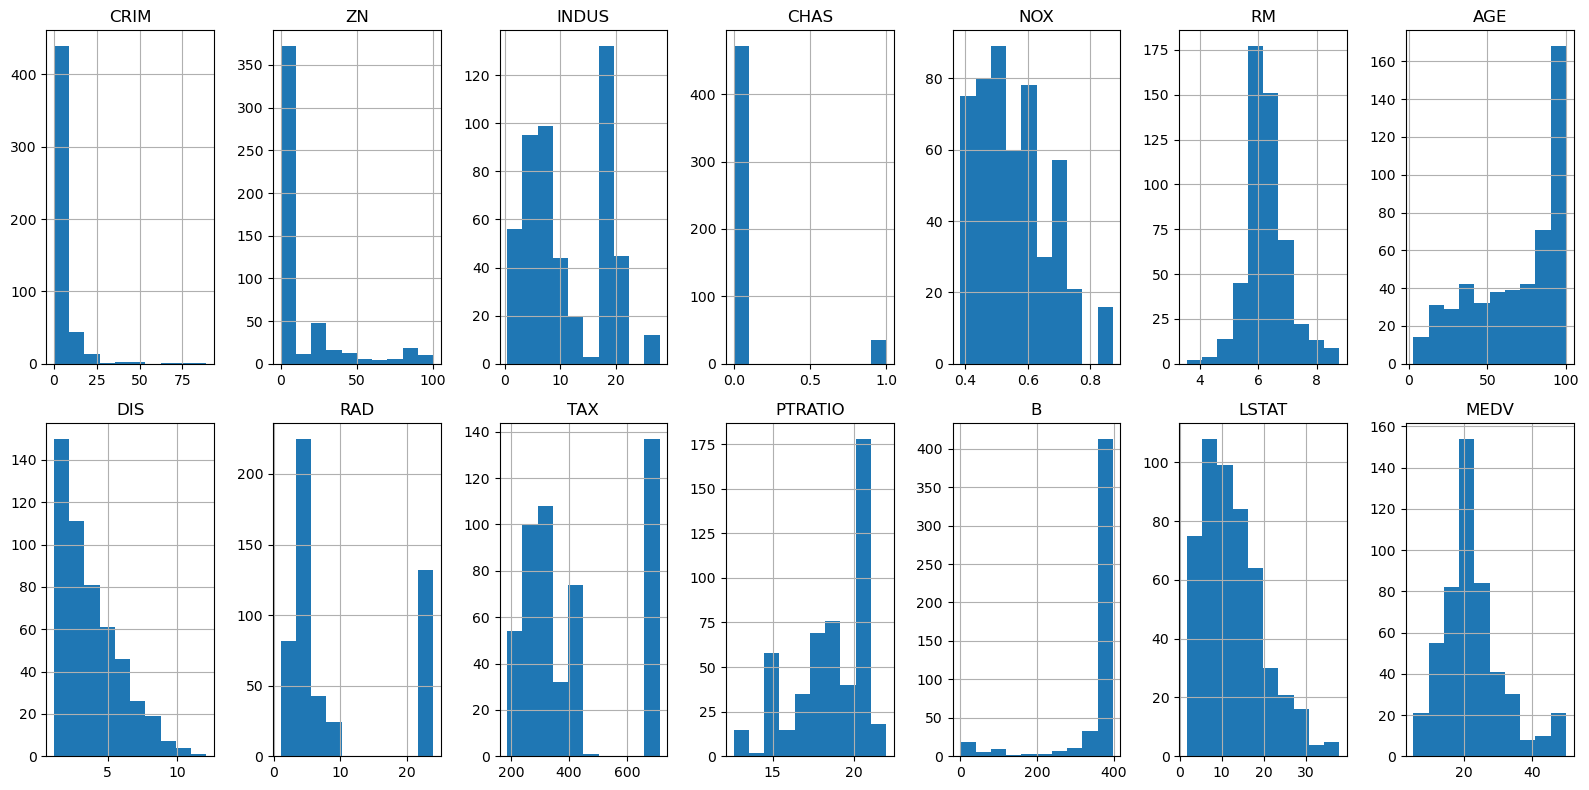

In [7]:
fig, axes = plt.subplots(2, 7, figsize=(16,8))
axes = axes.flatten()
cols = df.columns
for i, col in enumerate(cols):
    df[col].hist(ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.savefig('Histogramy.png')
plt.show()

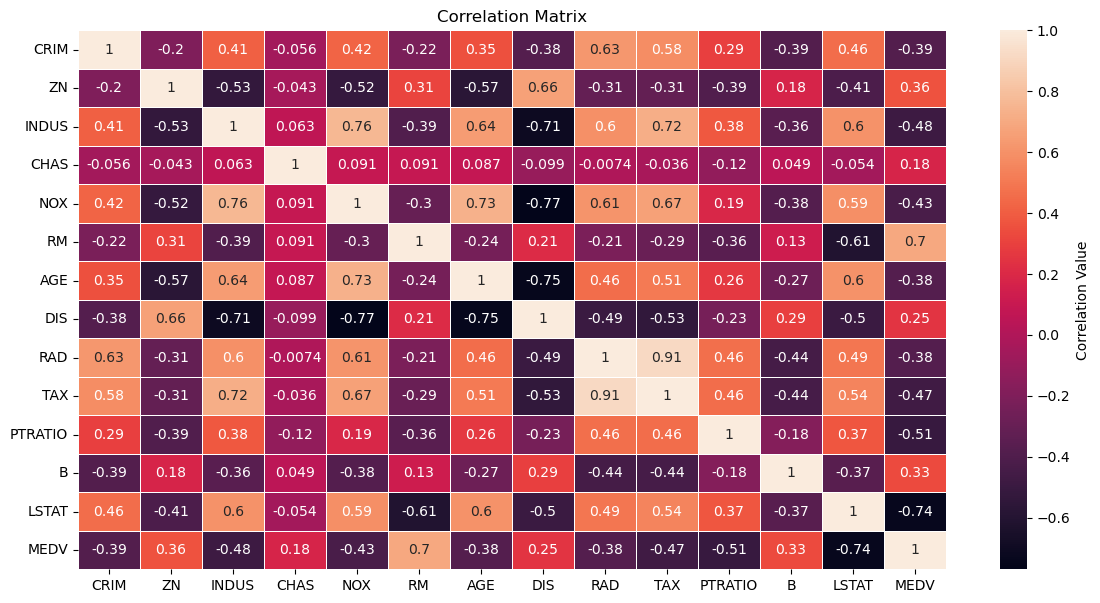

In [35]:
fig = plt.figure(figsize=(14,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, cbar_kws={'label': 'Correlation Value'})
plt.title('Correlation Matrix')
fig.show()

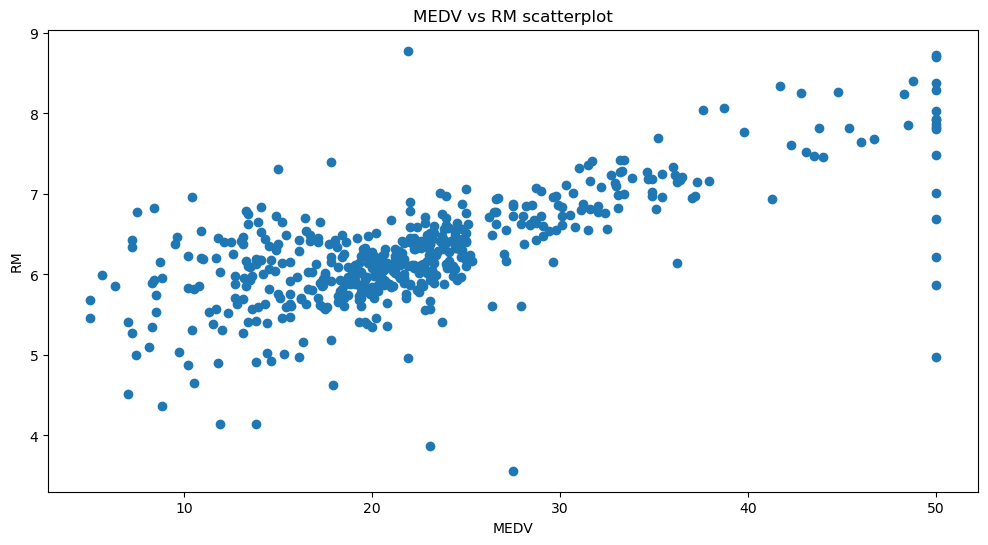

In [22]:
fig = plt.figure(figsize=(12,6))
plt.scatter(df['MEDV'], df['RM'])
plt.title('MEDV vs RM scatterplot')
plt.xlabel('MEDV')
plt.ylabel('RM')
fig.show()

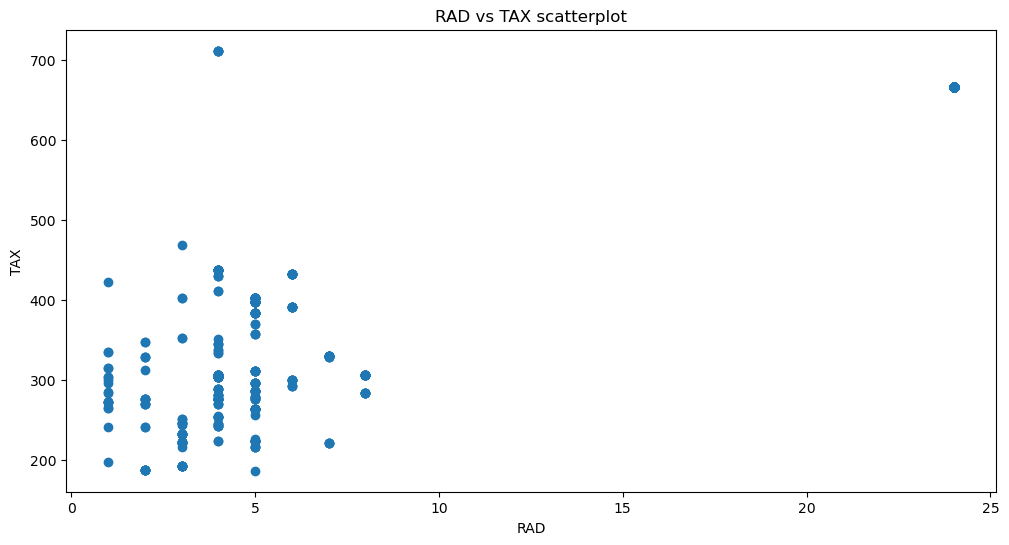

In [23]:
fig = plt.figure(figsize=(12,6))
plt.scatter(df['RAD'], df['TAX'])
plt.title('RAD vs TAX scatterplot')
plt.xlabel('RAD')
plt.ylabel('TAX')
fig.show()

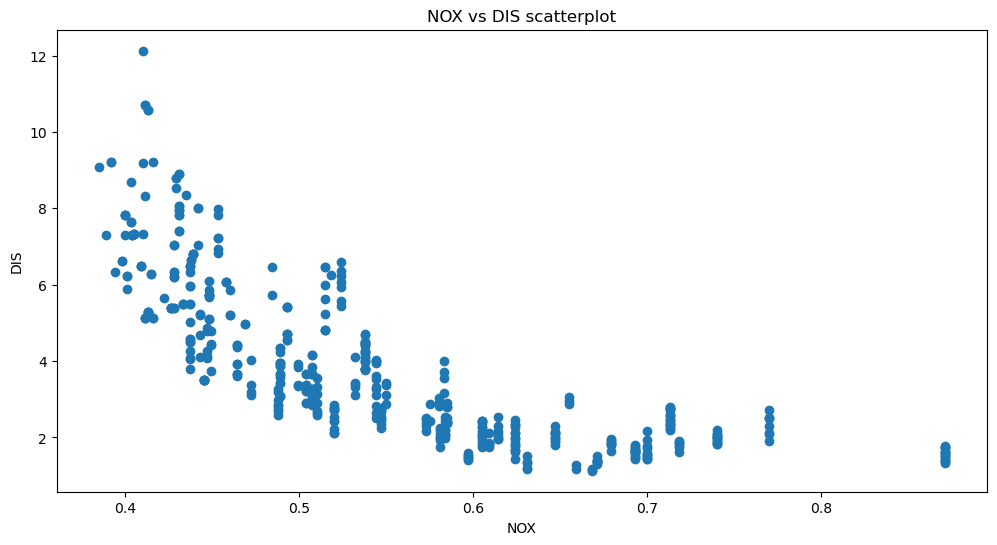

In [24]:
fig = plt.figure(figsize=(12,6))
plt.scatter(df['NOX'], df['DIS'])
plt.title('NOX vs DIS scatterplot')
plt.xlabel('NOX')
plt.ylabel('DIS')
fig.show()

3.     Podziel zbiór danych na zbiór treningowy i testowy. Możesz użyć funkcji train_test_split z biblioteki sklearn.



In [12]:
from sklearn.model_selection import train_test_split

X = df.drop(['MEDV'], axis=1)
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4.     Zbadaj różne modele takie jak regresja liniowa i XGBoost. Wykorzystaj bibliotekę sklearn, aby stworzyć modele i dopasować je do zbioru treningowego.

In [13]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [14]:
import xgboost as xgb

In [15]:
XG_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=10)
XG_reg.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=10,
             n_jobs=None, ...)

5.     Zastosuj GridSearchCV, aby dobrać optymalne hiperparametry dla modelu XGBoost. Możesz użyć różnych metryk ewaluacyjnych, takich jak MSE, RMSE, MAE, R2.

In [16]:
from sklearn.model_selection import GridSearchCV

params = {'learning_rate': [0.01, 0.1, 0.3], 'max_depth': [3, 5, 7], 'n_estimators':[50, 100, 200]}

XG = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3)

grid = GridSearchCV(estimator=XG, param_grid=params, cv=5, scoring='r2')
grid.fit(X_train, y_train)

print(f'Best score: {grid.best_score_} using params: {grid.best_params_}')

Best score: 0.836795487840878 using params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


Porównaj wyniki różnych modeli na zbiorze testowym, wykorzystując wybrane metryki ewaluacyjne.

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_LR = LR.predict(X_test)
print('LinearRegression - MSE: ', mean_squared_error(y_test, y_pred_LR))
print('LinearRegression - MAE: ', mean_absolute_error(y_test, y_pred_LR))
print('LinearRegression - R2: ', r2_score(y_test, y_pred_LR))

y_pred_grid = grid.predict(X_test)
print('Grid - MSE: ', mean_squared_error(y_test, y_pred_grid))
print('Grid - MAE: ', mean_absolute_error(y_test, y_pred_grid))
print('Grid - R2: ', r2_score(y_test, y_pred_grid))

LinearRegression - MSE:  24.29111947497345
LinearRegression - MAE:  3.189091965887843
LinearRegression - R2:  0.6687594935356329
Grid - MSE:  9.97201966835618
Grid - MAE:  2.079857303581986
Grid - R2:  0.8640187477229251


6.     Sprawdź czy spełnione są założenia dla regresji liniowej



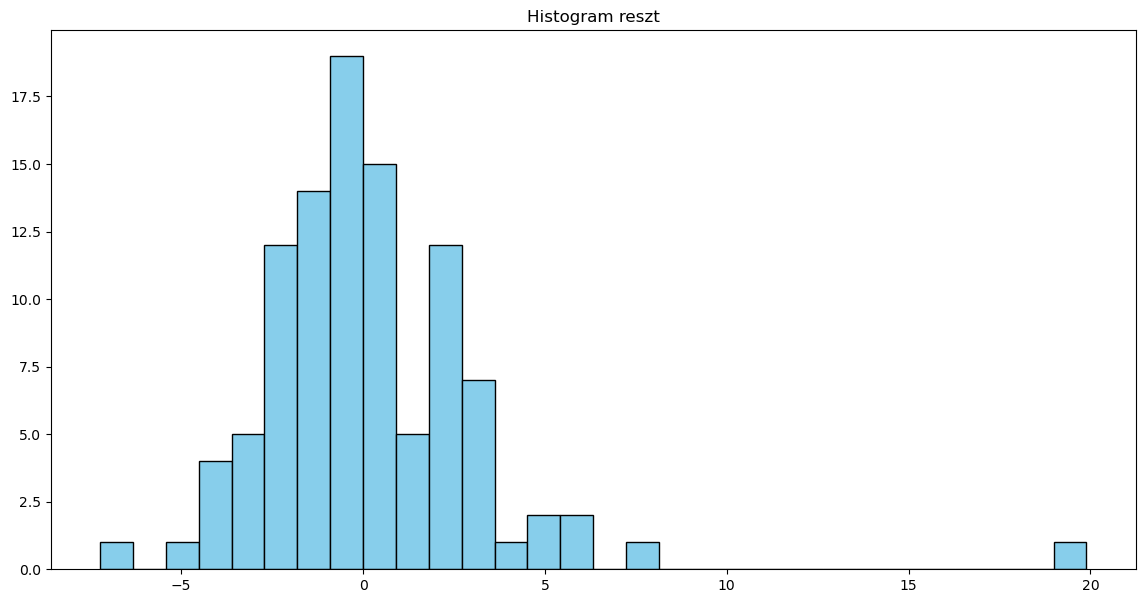

In [34]:
residuals = y_test - y_pred_grid
fig = plt.figure(figsize=(14,7))
plt.hist(residuals, bins=30, edgecolor='black', color='skyblue')
plt.title('Histogram reszt')
fig.show()

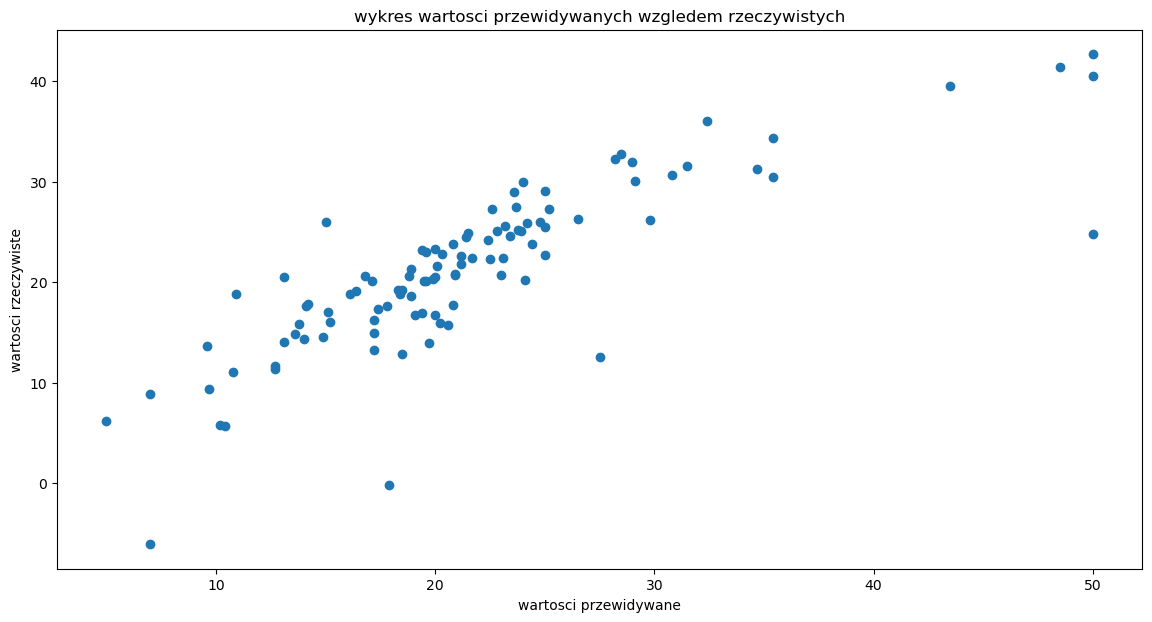

In [19]:
# wykres wartosci przewidywanych wzgledem wartosci rzeczywistych
fig = plt.figure(figsize=(14,7))
plt.scatter(y_test, y_pred_LR)
plt.title('wykres wartosci przewidywanych wzgledem rzeczywistych')
plt.xlabel('wartosci przewidywane')
plt.ylabel('wartosci rzeczywiste')
fig.show()

Histogram reszt przypomina rozkład normalny, a wykres wartosci przewidywanych wzgledem rzeczywistych przypomina liniowy, <br>
więc można powiedzieć, że spełnione są założenia regresji liniowej